# Simple Neural Network using Pytorch

In [1]:
# Import the torch neural network library
import torch
import torch.nn as nn

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2. Data Preparation  
Now we will define variables like input size, hidden unit, output size, batch size, and the learning rate.

In [2]:
n_input, n_hidden, n_out, batch_size, learning_rate = 10, 15, 1, 100, 0.01

We will now randomly initialize the dummy input and the output target data (or tensor)as follows:

In [3]:
# We initialized the input data with 100 data samples with 10 features each and respectively initialized the output data with 100 data points.
data_x = torch.randn(batch_size, n_input)
data_y = (torch.rand(size=(batch_size, 1)) < 0.5).float()

In [9]:
print(data_x.size())
print(data_y.size())

torch.Size([100, 10])
torch.Size([100, 1])


3. Define Neural Network Model  
Using in-built functions, we will create the simple sequential model with output sigmoid layer as follows:

In [10]:
model = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_out),
                      nn.Sigmoid())
print(model)

Sequential(
  (0): Linear(in_features=10, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=1, bias=True)
  (3): Sigmoid()
)


Next, we will define the loss function and the optimizer for gradient descent. Under the nn package, there are several different loss function.  
Here we will use nn.MSELoss as the loss function of the model which computes the mean-squared error between the input and the target.  
Similarly, torch.optim package provides various optimization algorithms. We will use stochastic gradient descent (SGD) optimizer.

In [11]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

4. Training Loop

Here, we will define the training loop with the following steps:  

Forward propagation — compute the predicted y and calculate the current loss  
Backward propagation — after each epoch we set the gradients to zero before starting to do backpropagation  
Gradient descent — Finally, we will update model parameters by calling optimizer.step() function

In [12]:
losses = []
for epoch in range(5000):
    pred_y = model(data_x)
    loss = loss_function(pred_y, data_y)
    losses.append(loss.item())

    model.zero_grad()
    loss.backward()

    optimizer.step()

5. Output  

We can plot the loss and see how the model is training over each epoch.

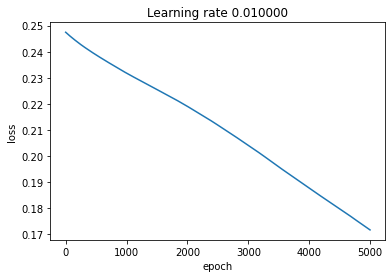

In [14]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()

We can see the loss is decreasing in each epoch which shows that the parameters are being learned.

In this tutorial, you learned a step-by-step approach to developing a simple neural network model in PyTorch.   
Specifically, you learned how to initialize random data, define the neural network model, and train them. The major advantage of using PyTorch comes in twofold:  

The use of a tensor that provides a capability of operating NumPy-like array in GPU (Graphical Processing Unit).  
Availability of deep neural networks built on a tape-based automatic differentiation system.  
Congrats on building and training your first neural network with PyTorch!

In [1]:
a = [1,2,3,4]

In [2]:
import torch

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
tdat = torch.tensor([1,2,3,4])

In [11]:
device = torch.device('cuda:0')

In [13]:
t1 = torch.tensor([
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1]
], dtype=torch.float32)

In [14]:
t2 = torch.tensor([
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2]
], dtype=torch.float32)

In [15]:
t3 = torch.tensor([
    [3,3,3,3],
    [3,3,3,3],
    [3,3,3,3],
    [3,3,3,3]
], dtype=torch.float32)

In [19]:
t = torch.stack((t1,t2,t3))

In [23]:
#rank of the tensor, means the maximum index used to get to individual tensor
len(t.shape)

3

In [25]:
# 3 is the batch size, 4 is height, and 4 is width
t.shape

torch.Size([3, 4, 4])

In [26]:
# to work with CNN we need to have the color channel, so we will add the color as below
t

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[2., 2., 2., 2.],
         [2., 2., 2., 2.],
         [2., 2., 2., 2.],
         [2., 2., 2., 2.]],

        [[3., 3., 3., 3.],
         [3., 3., 3., 3.],
         [3., 3., 3., 3.],
         [3., 3., 3., 3.]]])

In [27]:
t = t.reshape(3,1,4,4)
t

tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]],


        [[[2., 2., 2., 2.],
          [2., 2., 2., 2.],
          [2., 2., 2., 2.],
          [2., 2., 2., 2.]]],


        [[[3., 3., 3., 3.],
          [3., 3., 3., 3.],
          [3., 3., 3., 3.],
          [3., 3., 3., 3.]]]])

In [28]:
# First Image
t[0]

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [29]:
# First color channel
t[0][0]

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [30]:
# First height
t[0][0][0]

tensor([1., 1., 1., 1.])

In [31]:
# First width
t[0][0][0][0]

tensor(1.)

In [32]:
# We now need to flaten the tensor
# but we don't need to flatten the whole tensor, we need to floatten only the image

In [35]:
t0 = t.flatten(start_dim=1)

In [40]:
# element wise brpadcasting
t0

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.]])

In [41]:
# braadcasting preview
t0[0] + t0

tensor([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
        [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.]])

In [43]:
# reduction operation, like sup, product etc
t0.sum()

tensor(96.)

In [44]:
# number of elements
t0.numel()

48

In [45]:
# Sum rows, without any group by or dimention
t0.sum(dim=0)

tensor([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.])

In [46]:
# Sum rows, with one group by or dimention
t0.sum(dim=1)

tensor([16., 32., 48.])